<a href="https://colab.research.google.com/github/InsightByHarshit/Titanic-Analysis/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Copy of titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
data["Survived"].value_counts()  # Count of 0s and 1s

,count
Survived,
0,549
1,342


**Bar Plot for Survival Count**

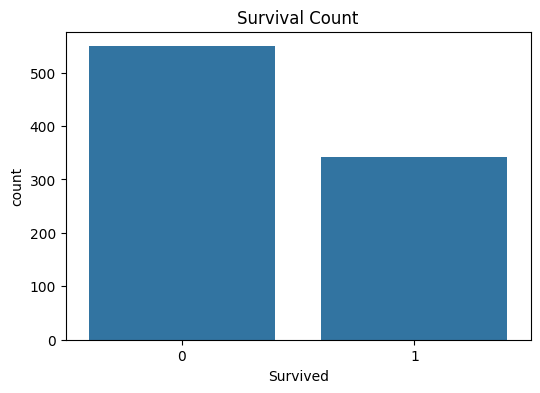

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Survived")
plt.title("Survival Count")
plt.show()

**Age Distribution**

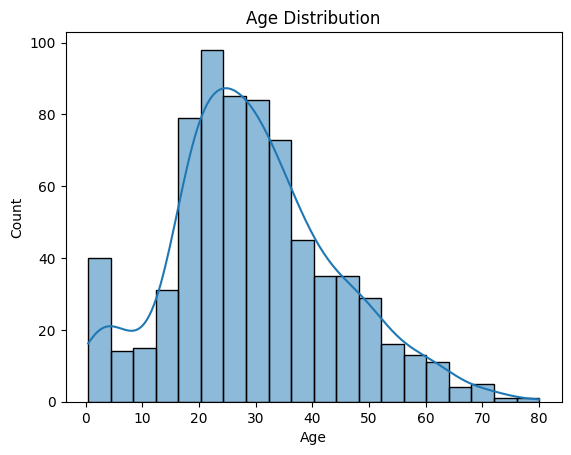

In [15]:
sns.histplot(data["Age"].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


**Fare Distribution**

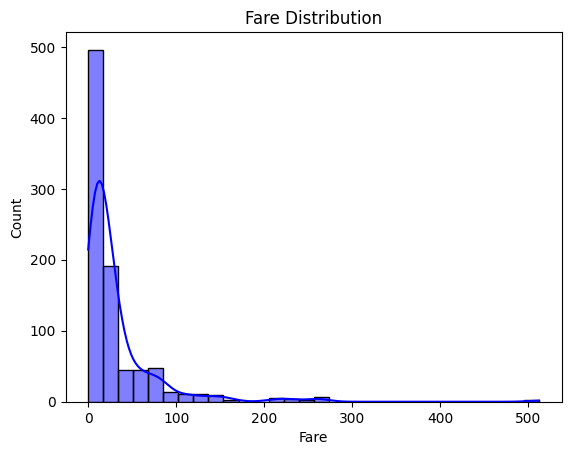

In [16]:
sns.histplot(data["Fare"], bins=30, kde=True, color="blue")
plt.title("Fare Distribution")
plt.show()


**Unique Values in Embarked**

In [17]:
data["Embarked"].unique()  # Unique ports of embarkation
data["Embarked"].value_counts()  # Frequency of each unique value


,count
Embarked,
S,644
C,168
Q,77


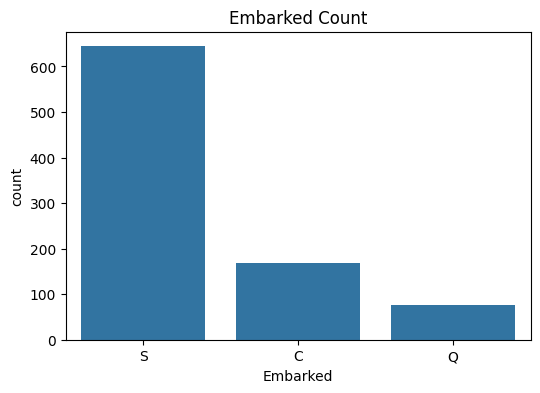

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Embarked")
plt.title("Embarked Count")
plt.show()

**Survival Rates by Sex**

Survival Rates by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


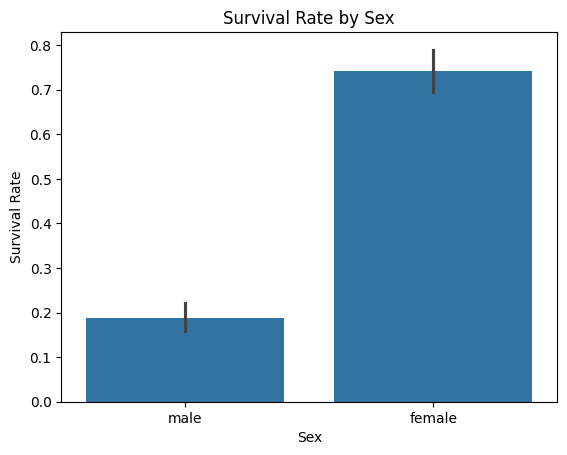

In [21]:
survival_by_sex = data.groupby("Sex")["Survived"].mean()
print("Survival Rates by Sex:")
print(survival_by_sex)

sns.barplot(data=data, x="Sex", y="Survived")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()


**Box Plot of Fare Distribution per Pclass**

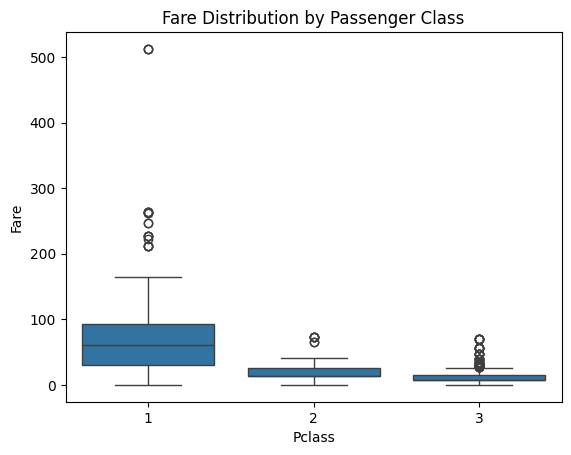

In [22]:
sns.boxplot(data=data, x="Pclass", y="Fare")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()


**Count Plot of Pclass vs Embarked**

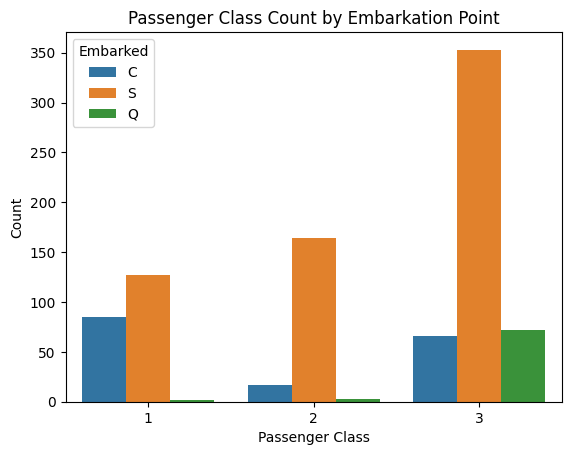

In [23]:
sns.countplot(data=data, x="Pclass", hue="Embarked")
plt.title("Passenger Class Count by Embarkation Point")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Embarked")
plt.show()


**Scatter Plot of Age vs Fare**

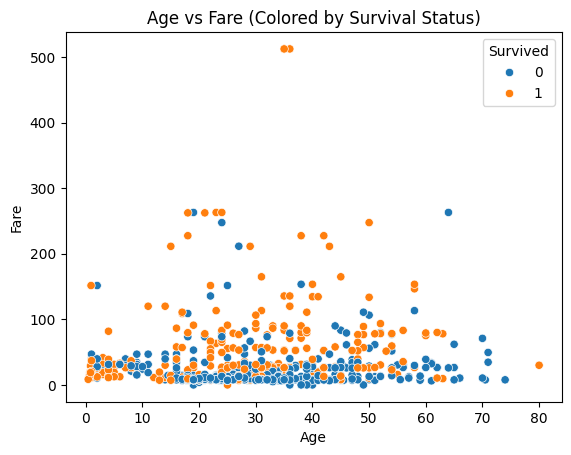

In [24]:
sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived")
plt.title("Age vs Fare (Colored by Survival Status)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()


**Survival Rates by Embarkation Point**



Survival Rates by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


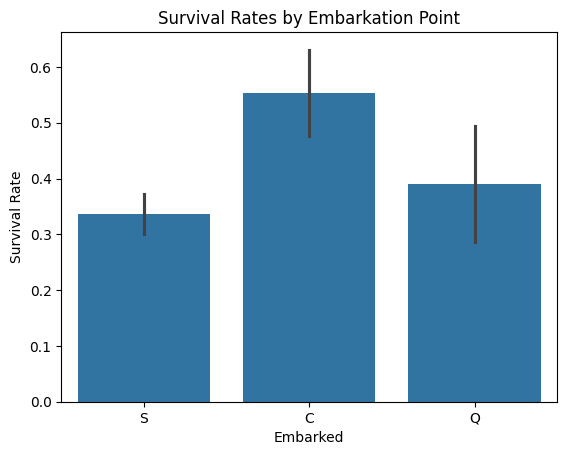

In [25]:
survival_by_embarked = data.groupby("Embarked")["Survived"].mean()
print("Survival Rates by Embarked:")
print(survival_by_embarked)

sns.barplot(data=data, x="Embarked", y="Survived")
plt.title("Survival Rates by Embarkation Point")
plt.ylabel("Survival Rate")
plt.show()


Relationship Between Age and Pclass


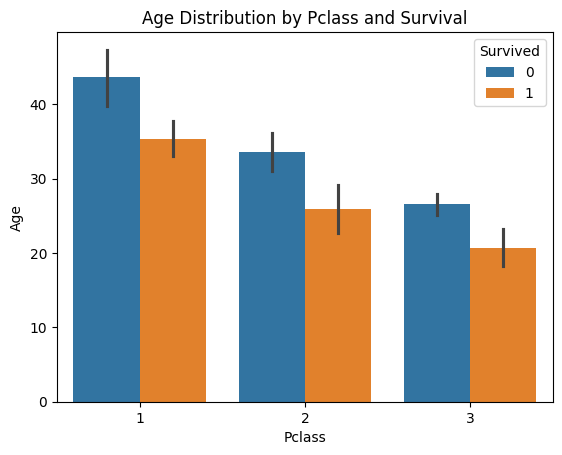

In [28]:
sns.barplot(data=data, x="Pclass", y="Age", hue="Survived")
plt.title("Age Distribution by Pclass and Survival")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()


**Pair Plot for Numerical Features**

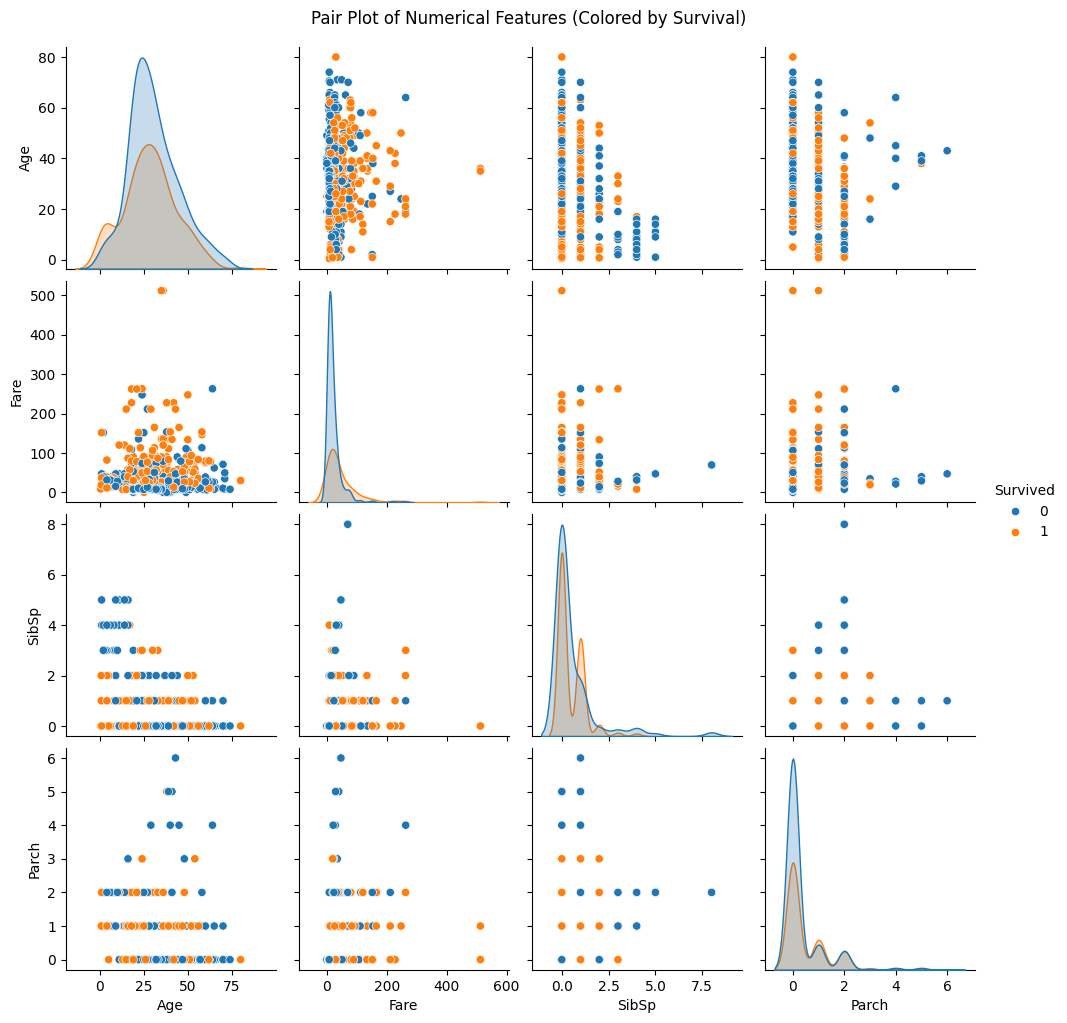

In [29]:
sns.pairplot(data, vars=["Age", "Fare", "SibSp", "Parch"], hue="Survived", diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features (Colored by Survival)", y=1.02)
plt.show()


**Heatmap for Correlation**

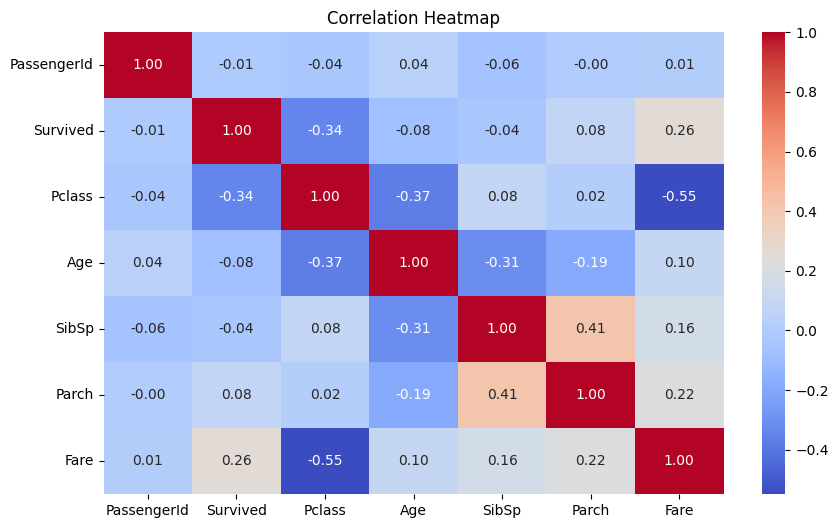

In [36]:
# Calculate the correlation matrix, but only for numerical features
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",)
plt.title("Correlation Heatmap")
plt.show()

**Survival Count Grouped by Pclass and Embarked**

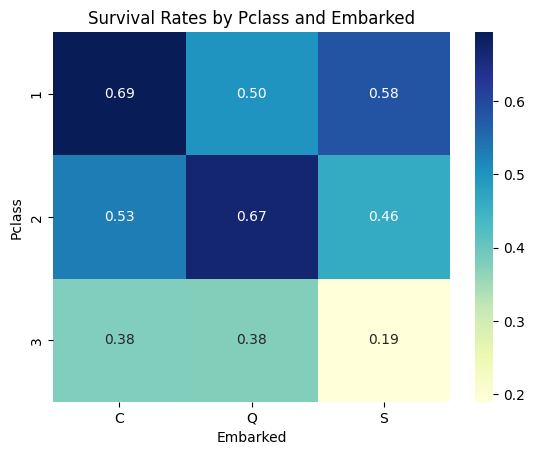

In [37]:
survival_grouped = data.groupby(["Pclass", "Embarked"])["Survived"].mean().unstack()
sns.heatmap(survival_grouped, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rates by Pclass and Embarked")
plt.xlabel("Embarked")
plt.ylabel("Pclass")
plt.show()


**Bar Plot of Survival Rates by Pclass and Sex**

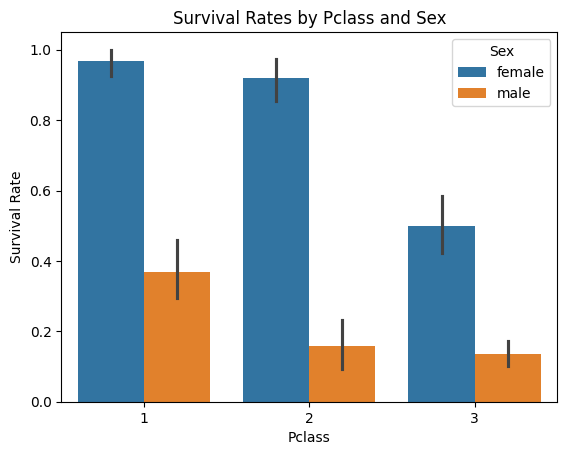

In [38]:
sns.barplot(data=data, x="Pclass", y="Survived", hue="Sex")
plt.title("Survival Rates by Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.legend(title="Sex")
plt.show()


Average Fare Paid by Pclass
**bold text**

Average Fare by Pclass:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


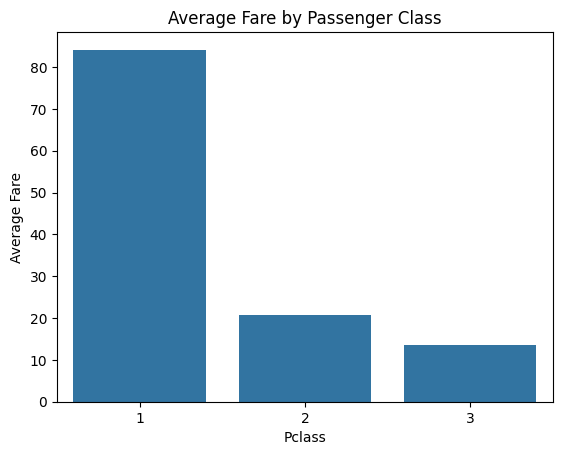

In [41]:
avg_fare_per_pclass = data.groupby("Pclass")["Fare"].mean()
print(f"Average Fare by Pclass:\n{avg_fare_per_pclass}")

sns.barplot(data=data, x="Pclass", y="Fare", errorbar=None, estimator=np.mean)
plt.title("Average Fare by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Average Fare")
plt.show()
